In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
ls

RTR.ipynb                         renttherunway_final_data.json.gz
renttherunway_final_data.json


In [151]:
data = pd.read_json('renttherunway_final_data.json', lines=True)
pd.set_option('display.max_columns', None)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [213]:
data = data.dropna(subset = ['rating'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192462 entries, 0 to 192543
Columns: 119 entries, user_id to height_in
dtypes: datetime64[ns](1), float64(2), int64(7), object(4), uint8(105)
memory usage: 41.3+ MB


In [153]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [199]:
# transform weight and height to numeric 
data['weight'] = data['weight'].transform(lambda x: str(x).replace('lbs', '') if str(x) != 'nan' else x).fillna(0).astype(int)

feet = data['height'].str[0].fillna(0).astype(int)
inch = data['height'].str[-3:-1].str.strip().fillna(0).astype(int)
data['height_in'] =  feet * 12 + inch 
data.height_in.unique()

array([68, 66, 64, 65, 69, 63, 62, 67, 61, 70, 72, 58, 73, 71, 60,  0, 59,
       56, 74, 75, 57, 54, 76, 55, 78])

In [154]:
# dummify fit, rented for, body type, category
data = pd.get_dummies(data, columns= ['fit', 'body type', 'rented for', 'category'], dummy_na=True)

In [155]:
# split bust size to bust size and cup size
data['bust_size'] = data['bust size'].transform(lambda x: str(x)[:2] if str(x) != 'nan' else x).fillna(0).astype(int)
data['cup size'] = data['bust size'].transform(lambda x: str(x)[2:] if str(x) != 'nan' else x)

# data['bust_size'] = data['bust size'].str[:2]
# data['cup size'] = data['bust size'].str[2:]

data = pd.get_dummies(data, columns = ['cup size'], dummy_na=True)

In [200]:
data.head()

,user_id,bust size,item_id,weight,rating,review_text,review_summary,height,size,age,review_date,fit_fit,fit_large,fit_small,fit_nan,body type_apple,body type_athletic,body type_full bust,body type_hourglass,body type_pear,body type_petite,body type_straight & narrow,body type_nan,rented for_date,rented for_everyday,rented for_formal affair,rented for_other,rented for_party,rented for_party: cocktail,rented for_vacation,rented for_wedding,rented for_work,rented for_nan,category_ballgown,category_blazer,category_blouse,category_blouson,category_bomber,category_buttondown,category_caftan,category_cami,category_cape,category_cardigan,category_coat,category_combo,category_crewneck,category_culotte,category_culottes,category_down,category_dress,category_duster,category_for,category_frock,category_gown,category_henley,category_hoodie,category_jacket,category_jeans,category_jogger,category_jumpsuit,category_kaftan,category_kimono,category_knit,category_legging,category_leggings,category_maxi,category_midi,category_mini,category_overalls,category_overcoat,category_pant,category_pants,category_parka,category_peacoat,category_poncho,category_print,category_pullover,category_romper,category_sheath,category_shift,category_shirt,category_shirtdress,category_skirt,category_skirts,category_skort,category_suit,category_sweater,category_sweatershirt,category_sweatpants,category_sweatshirt,category_t-shirt,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest,category_nan,bust_size,cup size_a,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_d+,cup size_dd,cup size_ddd/e,cup size_f,cup size_g,cup size_h,cup size_i,cup size_j,cup size_nan,year,height_in
0,420272,34d,2260466,137,5.0,An adorable romper! Belt and zipper were a lit...,So many compliments!,"5' 8""",14,28.0,2016-04-20,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2016,68
1,273551,34b,153475,132,5.0,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,"5' 6""",12,36.0,2013-06-18,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2013,66
2,360448,NaN,1063761,0,5.0,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,"5' 4""",4,116.0,2015-12-14,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2015,64
3,909926,34c,126335,135,4.0,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,"5' 5""",8,34.0,2014-02-12,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2014,65
4,151944,34b,616682,145,5.0,I have always been petite in my upper body and...,Was in love with this dress !!!,"5' 9""",12,27.0,2016-09-26,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016,69


In [157]:
data.user_id.nunique()

105571

In [158]:
data.item_id.nunique()

5850

In [232]:
data['age'] = data['age'].fillna(0)

<ipython-input-232-5445a5aa1c8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].fillna(0)


In [160]:
data['review_date'] = pd.to_datetime(data['review_date'])

In [28]:
# Review date range 2010-11-03 ~ 2018-01-08
data['review_date'].sort_values()

179582   2010-11-03
95281    2011-02-14
42851    2011-02-23
47750    2011-02-24
171955   2011-03-06
            ...    
182302   2018-01-06
38691    2018-01-07
69945    2018-01-07
19016    2018-01-07
40148    2018-01-08
Name: review_date, Length: 192544, dtype: datetime64[ns]

In [161]:
# divide rating by 2 so the rating is 1 to 5 instead of 2, 4, 6, 8, 10
data['rating'] = data['rating'] /2

In [162]:
data['rating'].value_counts()

5.0    124537
4.0     53391
3.0     10697
2.0      2791
1.0      1046
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

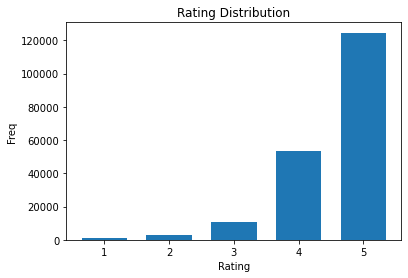

In [163]:
fig, ax = plt.subplots()
x = data['rating'].value_counts().index
y = data['rating'].value_counts()

ax.bar(x,y, width = 0.7)
ax.set_xlabel('Rating')
ax.set_ylabel('Freq')
ax.set_title('Rating Distribution')

Text(0.5, 1.0, 'Review Date Distribution')

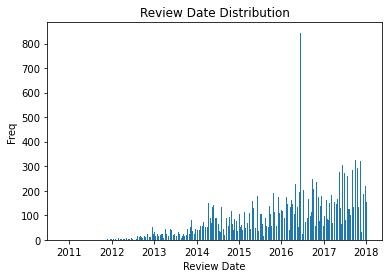

In [164]:
fig, ax = plt.subplots()
x = data['review_date'].value_counts().index
y = data['review_date'].value_counts()

ax.bar(x,y, width = 0.7)
ax.set_xlabel('Review Date')
ax.set_ylabel('Freq')
ax.set_title('Review Date Distribution')

In [165]:
data['year'] = data['review_date'].dt.to_period('Y').astype(str).astype(int)

In [166]:
data['year'].value_counts().sort_index()

2010        1
2011      209
2012     3365
2013     9617
2014    28269
2015    30596
2016    51361
2017    67871
2018     1255
Name: year, dtype: int64

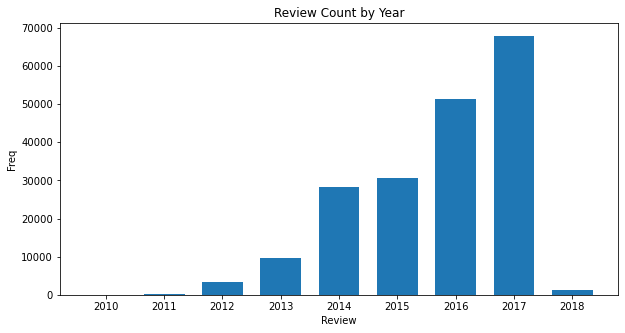

In [167]:
fig, ax = plt.subplots(figsize = (10,5))
x = data['year'].value_counts().index
y = data['year'].value_counts()

ax.bar(x,y, width = 0.7)
ax.set_xlabel('Review')
ax.set_ylabel('Freq')
ax.set_title('Review Count by Year')
ax.set_xticks(x);

In [233]:
X = data.drop(columns='rating')
y = data['rating']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [235]:
# Baseline model = always predict the mean rating
mean_rating = np.mean(y_train)
y_pred = np.full(y_test.shape, mean_rating)

mse = mean_squared_error(y_test, y_pred)

In [236]:
rmse = np.sqrt(mse)
rmse

0.7146114160372574

In [237]:
# Linear Regression
# Feature selection: fit: fit, large, weight, age, height_in
X_train_lr = X_train[['fit_fit', 'fit_large', 'weight', 'age', 'height_in']]
X_test_lr = X_test[['fit_fit', 'fit_large', 'weight', 'age', 'height_in']]

In [238]:
X_train_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144346 entries, 153576 to 128091
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   fit_fit    144346 non-null  uint8  
 1   fit_large  144346 non-null  uint8  
 2   weight     144346 non-null  int64  
 3   age        144346 non-null  float64
 4   height_in  144346 non-null  int64  
dtypes: float64(1), int64(2), uint8(2)
memory usage: 4.7 MB


In [239]:
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train)
y_pred = lr_model.predict(X_test_lr)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.6911632596141852